<a href="https://colab.research.google.com/github/TumSim/python_data_analytics1/blob/main/Python_Aikasarjat_ja_aikasarjaennustaminen_Tehtava3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/MyDrive/data

Mounted at /gdrive
/gdrive/MyDrive/data


In [2]:
!pip install yfinance

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from statsmodels.tsa.api import seasonal_decompose
from statsmodels.tsa.api import ExponentialSmoothing
sns.set_style("darkgrid")

### **Terveystalo ja Pihlajalinna**

In [4]:
terveystalo = yf.download("TTALO.HE", start = "2018-1-1")
pihlajalinna = yf.download("PIHLIS.HE", start = "2018-1-1")

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [5]:
terveystalo, pihlajalinna

(             Open   High    Low  Close  Adj Close  Volume
 Date                                                     
 2018-01-02  8.920  9.148  8.920  9.056   7.696176  223686
 2018-01-03  9.149  9.370  9.149  9.213   7.829600  113248
 2018-01-04  9.270  9.406  9.270  9.361   7.955378   67368
 2018-01-05  9.450  9.475  9.360  9.430   8.014016   52670
 2018-01-08  9.495  9.570  9.470  9.551   8.116848  137462
 ...           ...    ...    ...    ...        ...     ...
 2024-01-18  7.750  7.790  7.650  7.750   7.750000   43916
 2024-01-19  7.750  7.760  7.700  7.750   7.750000   24717
 2024-01-22  7.700  7.780  7.690  7.740   7.740000   20053
 2024-01-23  7.730  7.790  7.710  7.720   7.720000   18588
 2024-01-24  7.760  7.770  7.700  7.720   7.720000   15260
 
 [1525 rows x 6 columns],
              Open   High    Low  Close  Adj Close  Volume
 Date                                                     
 2018-01-02  13.54  14.10  13.52  14.10  13.214400   52265
 2018-01-03  14.18  14.68  1

**Katsaus Terveystalon ja Pihlajalinnan kurssiin 2018- 2023**

Molemilla yhtiöillä pystytään näkemään koronan vaikutus pörssikurssissa.

Myös tämän hetken taantuman on nähtävissä selkeästi molemmilla yhtiöillä.

2022 alkanut Venäjän hyökkäys sota on myös vaikuttanut talouteen negatiivisesti, joka näkyy myös kyseisten yhtiöiden kursseissa.

<Axes: xlabel='Date'>

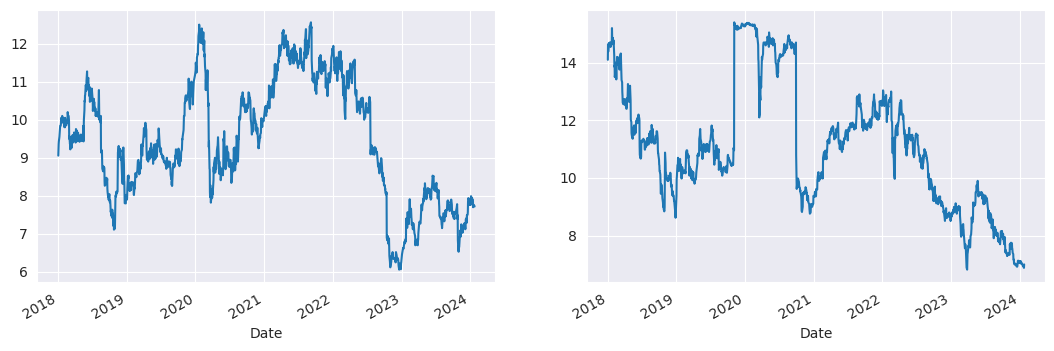

In [6]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(13, 4))
terveystalo['Close'].plot(ax=axs[0])
pihlajalinna['Close'].plot(ax=axs[1])

Voidaan tarkastella myös kuukausitasolla sulkuhintojen keskiarvoilla.

<Axes: xlabel='Date'>

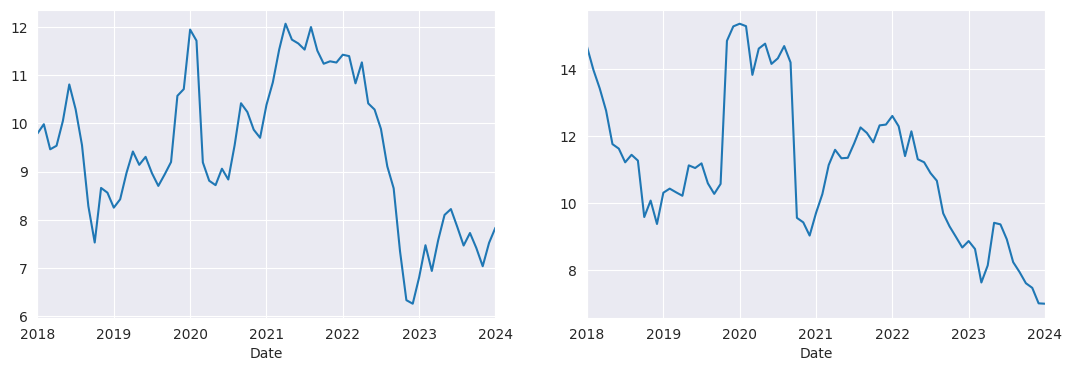

In [7]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(13, 4))
terveystalo['Close'].resample('M').mean().plot(ax=axs[0])
pihlajalinna['Close'].resample('M').mean().plot(ax=axs[1])

Osakkeen vaihdon määrät kuvattuna kuukausittain.

<Axes: xlabel='Date'>

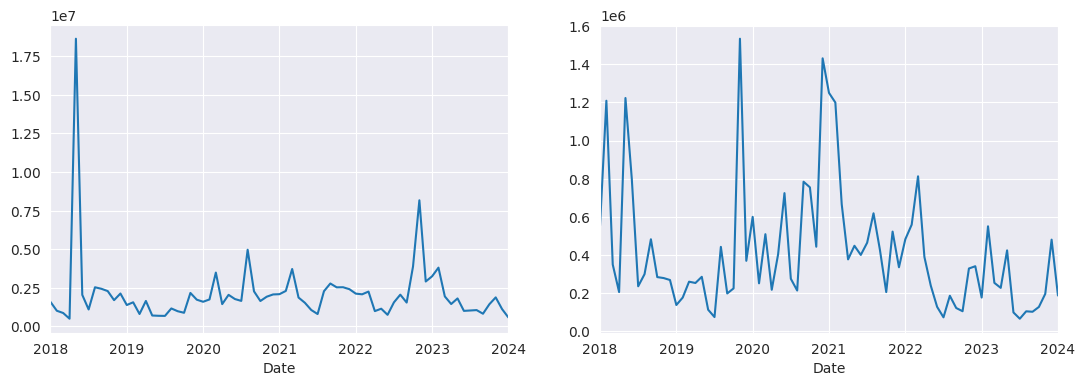

In [8]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(13, 4))
(terveystalo['Volume']).resample('M').sum().plot(ax=axs[0])
(pihlajalinna['Volume']).resample('M').sum().plot(ax=axs[1])

Kvartaali tasolla kuvattuna molempien yhtiöiden sulkuhintojen keskiarvot 2018- 2023.

Kvartaaleissa voidaan hyvin esimerkiksi nähdä sodan ajankohta.

<Axes: xlabel='Date'>

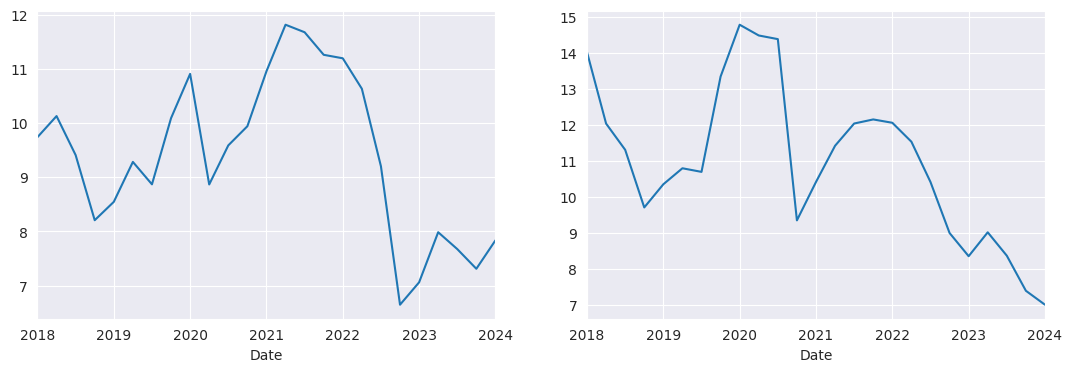

In [9]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(13, 4))
terveystalo['Close'].resample('Q').mean().plot(ax=axs[0])
pihlajalinna['Close'].resample('Q').mean().plot(ax=axs[1])

Osakkeen vaihdon määrät kuvattuna kvartaalittain.

Text(0, 0.5, 'Miljoonaa kpl')

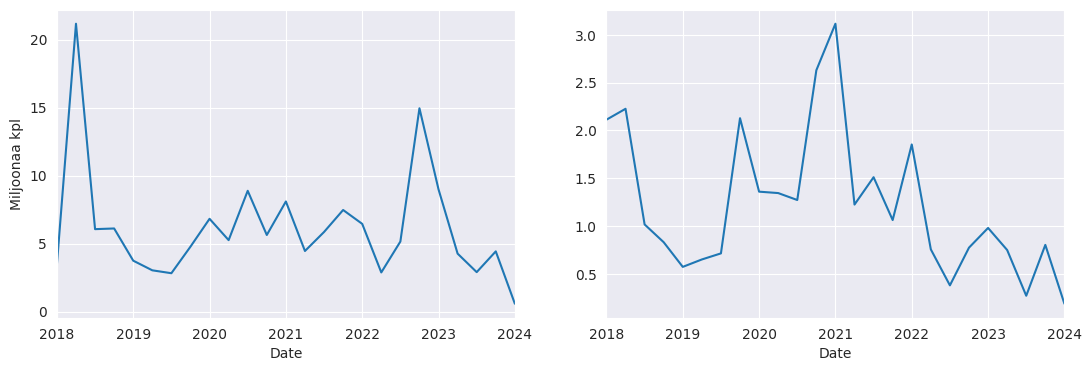

In [10]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(13, 4))
(terveystalo['Volume'] / 1_000_000).resample('Q').sum().plot(ax=axs[0])
(pihlajalinna['Volume'] / 1_000_000).resample('Q').sum().plot(ax=axs[1])
axs[0].set_ylabel('Miljoonaa kpl')

**Yhtiöiden kurssit kuvattuna vuosi tasolla**

Korkojen nousu myös vaikutti laajalti osake-kursseihin alkuvuodesta, mutta ottivat korjausliikkeen hiljalleen.

<Axes: xlabel='Date'>

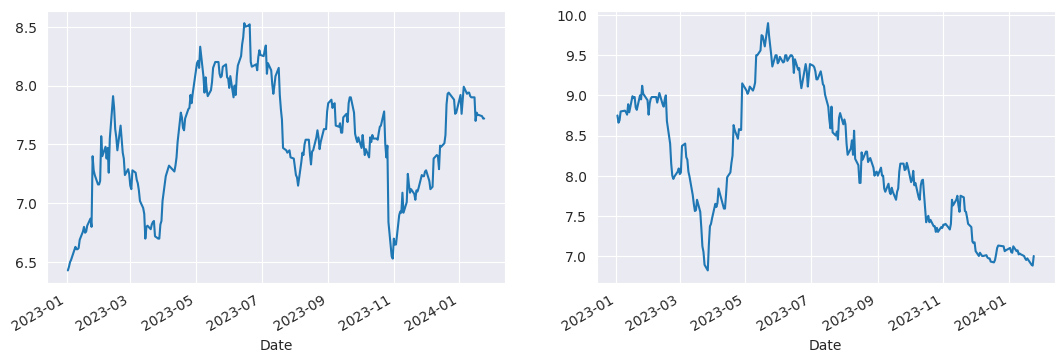

In [11]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(13, 4))
terveystalo['Close']['2023':].plot(ax=axs[0])
pihlajalinna['Close']['2023':].plot(ax=axs[1])

**Liukuvat keskiarvot**

**Terveystalo**

Voidaan nähdä mahdollisesti osto- ja myynti signaaleita.

Esimerkiksi 2022 loppu puolella nähdään tilanne jossa, olisi hyvin voitu käyttää tätä ajattelu tapaa myynti tilanteessa.

Tai esimerkiksi 2021 loppu vuodesta oltaisiin voitu tulkita myynti signaali kun lyhyt keskiarvo puotaa pitkän keskiarvon alapuolelle. Tämä voitaisiin tulkita hyvänä myyntisignaalina.

<Axes: xlabel='Date'>

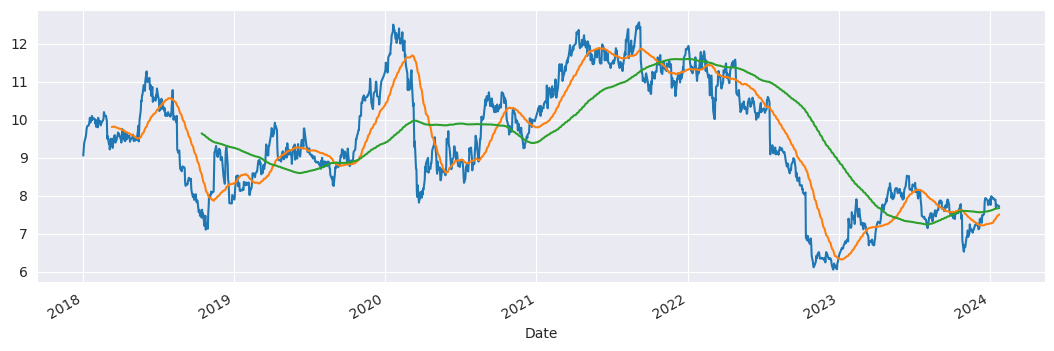

In [12]:
terveystalo["Close"].plot(figsize = (13, 4))

terveystalo["Close"].rolling(50).mean().plot()
terveystalo["Close"].rolling(200).mean().plot()

**Liukuvat keskiarvot**

**Pihlajalinna**

Pihlajalinnan kohdalla voidaan myös nähdä osto- ja myyntisignaaleita.

Esimerkiksi vuoden 2021 noin puolivälissä olisi mahdollisesti ollut hyvä osto hetki. Kun taas vuoden 2022 alussa olisi ollut mahdollisesti hyvä myyntisignaali.

<Axes: xlabel='Date'>

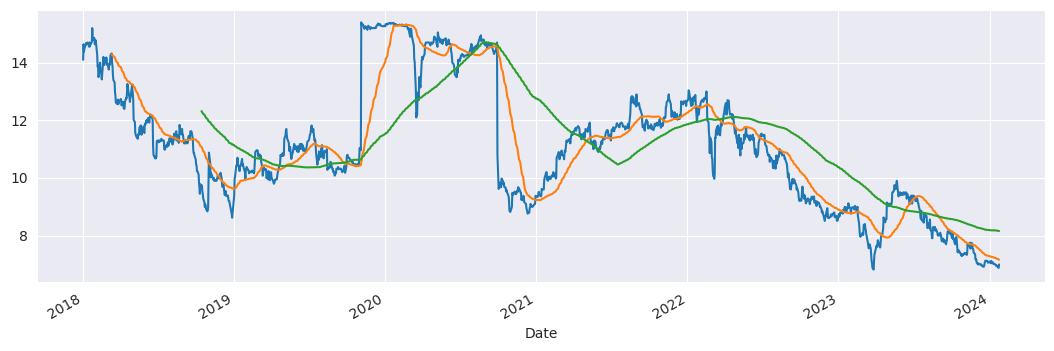

In [13]:
pihlajalinna["Close"].plot(figsize = (13, 4))

pihlajalinna["Close"].rolling(50).mean().plot()
pihlajalinna["Close"].rolling(200).mean().plot()

**Muutos prosentteja**

In [14]:
#Lisätään muutos prosentti sarakkeet

terveystalo["Terveystalo%"] = terveystalo["Close"].pct_change()
pihlajalinna["Pihlajalinna%"] = pihlajalinna["Close"].pct_change()

pihlajalinna

,Open,High,Low,Close,Adj Close,Volume,Pihlajalinna%
Date,,,,,,,
2018-01-02,13.54,14.10,13.52,14.10,13.214400,52265,NaN
2018-01-03,14.18,14.68,14.16,14.64,13.720483,43157,0.038298
2018-01-04,14.90,14.90,14.32,14.38,13.476813,43484,-0.017760
2018-01-05,14.44,14.62,14.34,14.48,13.570532,27069,0.006954
2018-01-08,14.60,14.76,14.54,14.62,13.701738,23205,0.009669
...,...,...,...,...,...,...,...
2024-01-18,6.96,6.99,6.95,6.97,6.970000,18687,0.002878
2024-01-19,7.04,7.05,6.93,6.95,6.950000,9481,-0.002869
2024-01-22,6.95,6.99,6.89,6.89,6.890000,5296,-0.008633


In [15]:
muutos = pd.concat([terveystalo["Terveystalo%"], pihlajalinna["Pihlajalinna%"]], axis = 1)

muutos = muutos.fillna(0)

muutos

,Terveystalo%,Pihlajalinna%
Date,,
2018-01-02,0.000000,0.000000
2018-01-03,0.017337,0.038298
2018-01-04,0.016064,-0.017760
2018-01-05,0.007371,0.006954
2018-01-08,0.012831,0.009669
...,...,...
2024-01-18,-0.002574,0.002878
2024-01-19,0.000000,-0.002869
2024-01-22,-0.001290,-0.008633


Kuluvan vuoden muutosprosentti

Huomattavaa on Terveystalon osto piikit vuoden alkupuolella, yhtä voimakasta vaihtelua ei ole Pihlajalinnan osakkeella. Muissa tapauksissa kuljetään hyvin samantyyppisessä syklissä. Pihlajalinnan ostopiikit hieman suuremmat, kuin Terveystalon, mutta ne ovat hyvin samanaikaisia molemmilla. Poislukien Pihlajalinnan loppuvuoden yli 6% pudotusta.

<ipython-input-16-66116644352e>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  (muutos["2023"] * 100).plot(figsize = (13, 4))


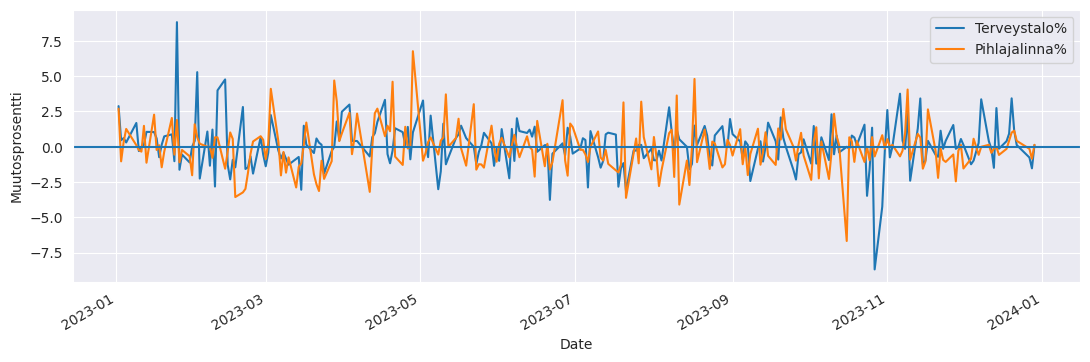

In [16]:
(muutos["2023"] * 100).plot(figsize = (13, 4))
plt.ylabel("Muutosprosentti")
plt.axhline()

**Tunnuslukuja**

Huomattavaa on Pihlalinnan pienin ja suurin, jotka ovat yli -26% ja yli 40%.

In [17]:
(muutos * 100).describe().round(2)

,Terveystalo%,Pihlajalinna%
count,1525.00,1525.00
mean,0.00,-0.03
std,1.74,2.00
min,-14.71,-26.53
25%,-0.88,-0.78
50%,0.00,0.00
75%,0.98,0.64
max,8.82,40.51


<Axes: >

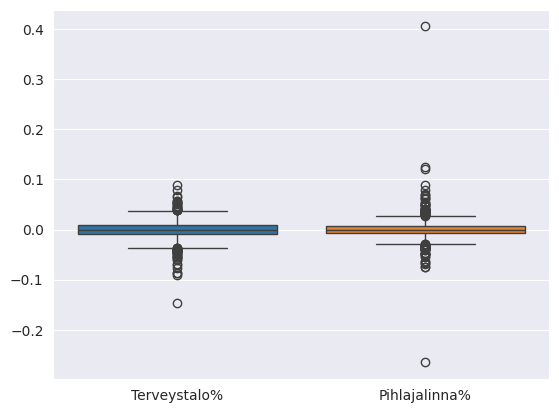

In [18]:
sns.boxplot(data = muutos)

**Huomattavat muutokset**

In [19]:
muutos[(abs(muutos['Terveystalo%'])>0.08) | (abs(muutos["Pihlajalinna%"])>0.08)]

,Terveystalo%,Pihlajalinna%
Date,,
2018-08-17,-0.087624,0.017699
2018-11-01,0.023194,0.121246
2019-01-02,-0.015576,0.089327
2019-11-05,0.033663,0.405109
2020-09-29,-0.009615,-0.265306
2022-03-09,0.053892,0.124260
2022-07-19,-0.089866,-0.022222
2022-10-14,-0.147095,-0.020408
2023-01-25,0.088235,0.018994


**Muutos prosenttien korrelaatio**

Voidaan nähdä, että Terveystalon ja Pihlajalinnan muutosprosentit korreloivat positiivisesti. Tämä helposti havaittavissa hajontakaaviossa, jossa pisteet kerääntyvät hyvin lähelle toisiaan.

In [20]:
muutos.corr()

,Terveystalo%,Pihlajalinna%
Terveystalo%,1.000000,0.217414
Pihlajalinna%,0.217414,1.000000


<Axes: xlabel='Terveystalo%', ylabel='Pihlajalinna%'>

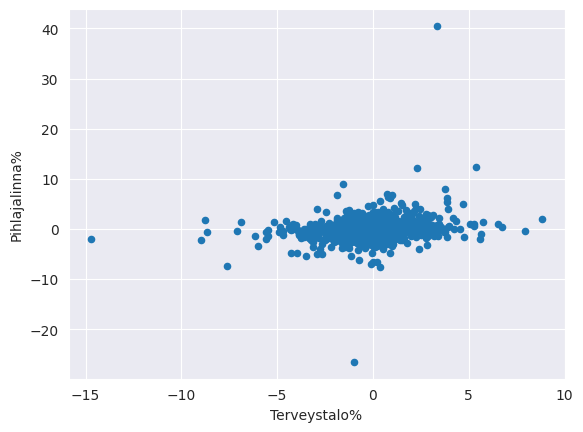

In [21]:
(muutos * 100).plot.scatter(x = "Terveystalo%", y = "Pihlajalinna%")

Liukuva korrelaatio kertoo miten korrelaatio on muuttunut ajan kuluessa. Aikaa muuttaessa voidaan myös nähdä mielenkiintoisia eroja.

Yrityksen omat asiat ovat voineet vaikuttaa hyvin paljon korreloimiseen, mutta esimerkiksi sodan ajankohta on hyvin nähtävissä kaaviossa.

<Axes: xlabel='Date'>

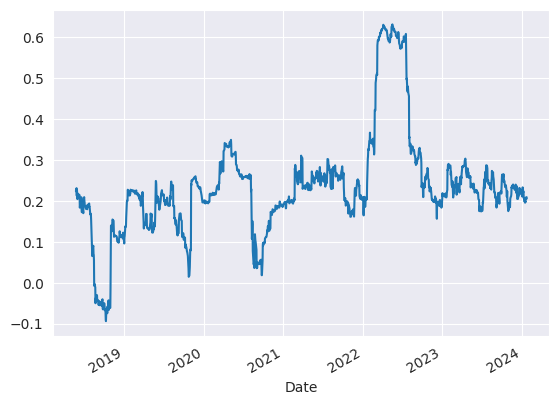

In [22]:
muutos["Terveystalo%"].rolling(100).corr(muutos["Pihlajalinna%"]).plot()

**Volatiliteetti**

Koronan alussa pihlajalinnan riski ollut hurjassa kasvussa. Vaihtelu on myös ollut hyvin rajua. Terveystalolla nähtävissä pienemmän riskin käyrää.

<Axes: xlabel='Date'>

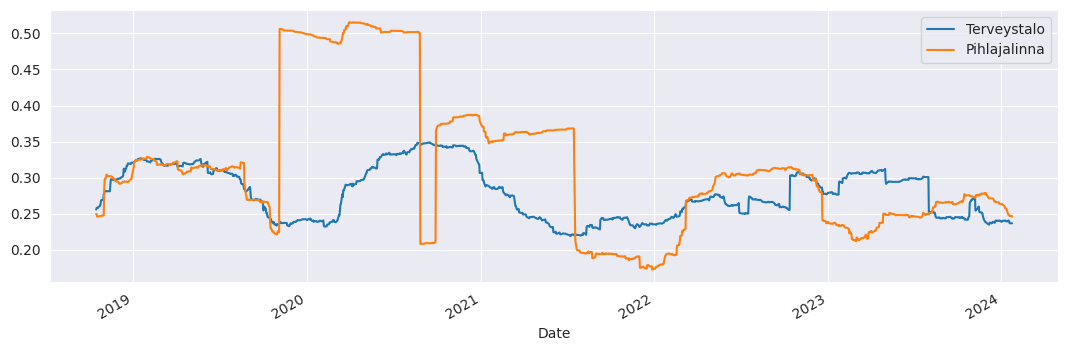

In [23]:
plt.figure(figsize = (13,4))
(muutos["Terveystalo%"].rolling(200).std()*(252**0.5)).plot(label = "Terveystalo", legend = True)
(muutos["Pihlajalinna%"].rolling(200).std()*(252**0.5)).plot(label = "Pihlajalinna", legend = True)

### **Lentomatkustus**

In [24]:
df = pd.read_csv('AirPassengers.csv')
df.index = pd.to_datetime(df['Month'],format='%Y-%m')
df = df.drop('Month',axis=1)
df

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


Kausivaihtelu ja trendi on huomattavissa nopeastikkin. Kausivaihtelun sykli näyttää noin vuodelta. Kuvaajassa on myös nähtävissä selkeä kasvava trendi.

Aineistoon voitaisiin hyvin tehdä aikasarja ennuste.

<Axes: xlabel='Month'>

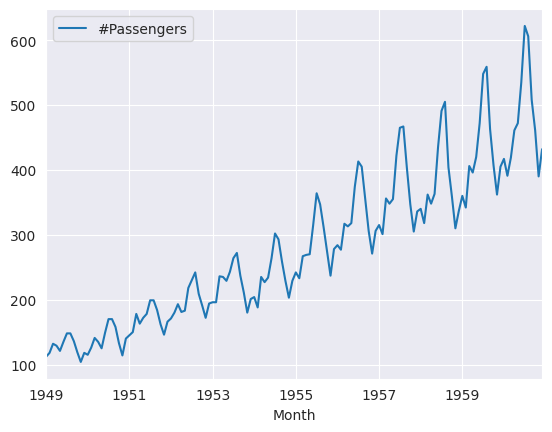

In [25]:
df.plot()

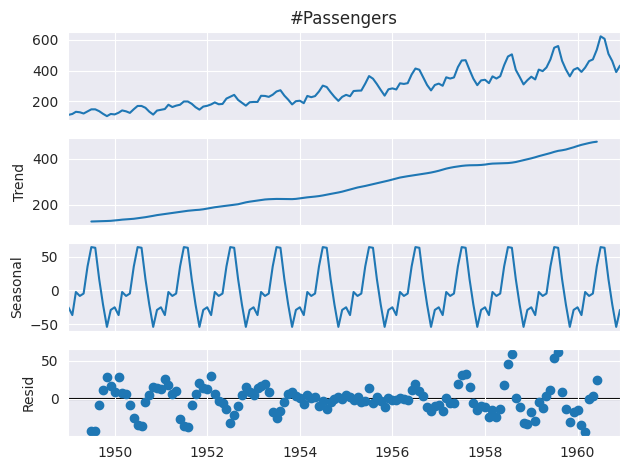

In [26]:
decompose = seasonal_decompose(df['#Passengers']).plot()

**Ennuste malli**

In [27]:
model = ExponentialSmoothing(df['#Passengers'], trend = "add", seasonal = "mul", seasonal_periods = 12, freq = "MS").fit()

In [28]:
df["Ennuste"] = model.fittedvalues
df

,#Passengers,Ennuste
Month,,
1949-01-01,112,111.418539
1949-02-01,118,120.062000
1949-03-01,132,134.827184
1949-04-01,129,130.592576
1949-05-01,121,124.085625
...,...,...
1960-08-01,606,625.009023
1960-09-01,508,506.744600
1960-10-01,461,443.213024


Katsotaan toteutuneita ja ennusteita visuaalisesti.

Ennuste näyttää hyvinkin lupaavalta. Pientä virhettä havaittavissa.

<Axes: xlabel='Month'>

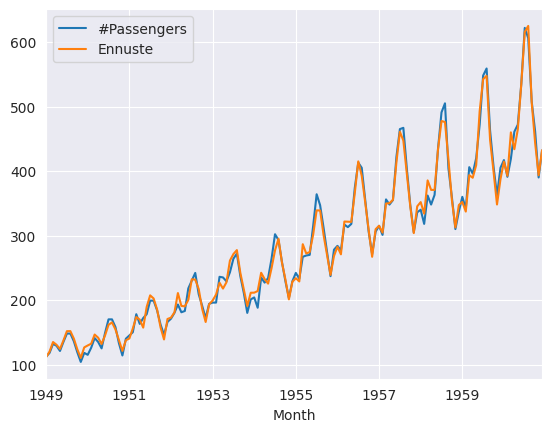

In [29]:
df.plot()

Otetaan ennustevirheet näkyviin resid toiminnolla.

In [30]:
df["Ennustevirhe"] = model.resid
df

,#Passengers,Ennuste,Ennustevirhe
Month,,,
1949-01-01,112,111.418539,0.581461
1949-02-01,118,120.062000,-2.062000
1949-03-01,132,134.827184,-2.827184
1949-04-01,129,130.592576,-1.592576
1949-05-01,121,124.085625,-3.085625
...,...,...,...
1960-08-01,606,625.009023,-19.009023
1960-09-01,508,506.744600,1.255400
1960-10-01,461,443.213024,17.786976


Tarkastellaan ennustevirheet visuaalisesti.

Suurimmillaan heittoa on -40 ja 30. Muuten pysytään 20 ja -20 välissä hyvin pitkälti.

Text(0, 0.5, 'Ennustevirhe')

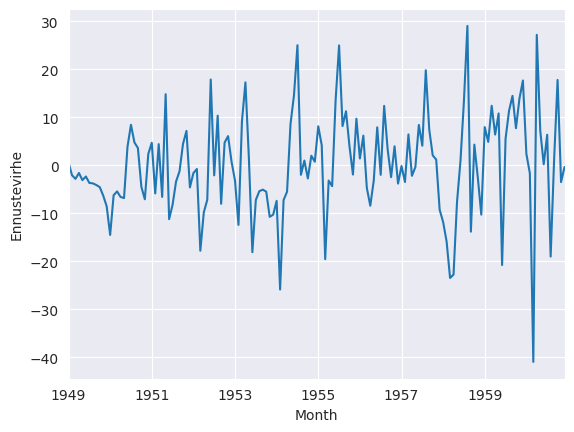

In [31]:
df["Ennustevirhe"].plot()
plt.ylabel("Ennustevirhe")

Voidaan tarkastella vielä hajontakaaviolla.

Pisteet sijoittuvat hyvin pitkälti samalle linjalle. Ei havaittavissa suuria poikkeamia linjasta, jolloin voidaan pitää ennustetta hyvänä.

Text(0, 0.5, 'Toteutunut kysyntä')

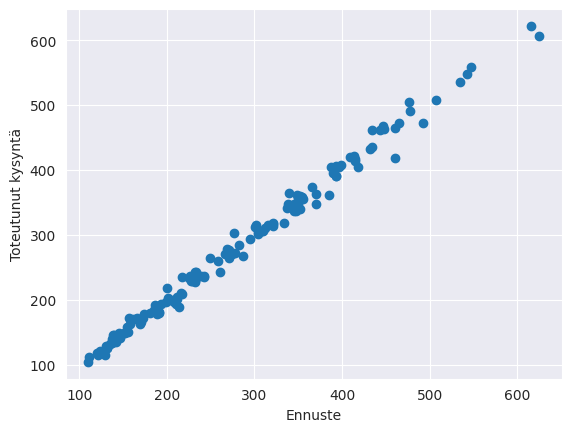

In [32]:
plt.scatter(x = df["Ennuste"], y = df['#Passengers'])
plt.xlabel("Ennuste")
plt.ylabel("Toteutunut kysyntä")

**Ennuste**

Tarkastetaan viimeinen päivämäärä aikasarjasta.

In [33]:
df.tail()

,#Passengers,Ennuste,Ennustevirhe
Month,,,
1960-08-01,606,625.009023,-19.009023
1960-09-01,508,506.744600,1.255400
1960-10-01,461,443.213024,17.786976
1960-11-01,390,393.493719,-3.493719
1960-12-01,432,432.351048,-0.351048


Lasketaan ennusteet seuraavalle vuodelle ja esitetään ne.

In [34]:
index = pd.date_range(df.index[-1] + pd.offsets.MonthBegin(1), periods = 12, freq = "MS")

ennusteet = model.forecast(12)

df_ennuste = pd.DataFrame(data = ennusteet, index = index, columns = ["Ennuste"])
df_ennuste

,Ennuste
1961-01-01,445.242361
1961-02-01,418.225341
1961-03-01,465.309832
1961-04-01,494.951245
1961-05-01,505.475873
1961-06-01,573.312666
1961-07-01,663.596376
1961-08-01,654.904046
1961-09-01,546.760994
1961-10-01,488.446831


Tarkastellaan visuaalisesti, kuinka ennuste jatkaa toteutunutta aikasarjaa.

Näiden pohjalta pystyttäisiin varautumaan liiketoiminissa oikeanlaisilla toimilla. Kapasiteetin kasvattimisella oikeissa paikoissa.

<Axes: xlabel='Month'>

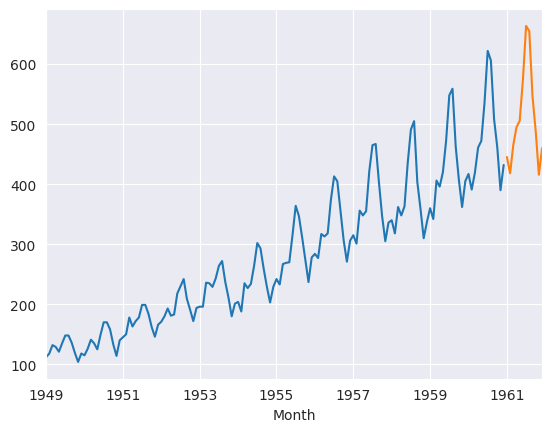

In [35]:
df["#Passengers"].plot()
df_ennuste["Ennuste"].plot()

In [36]:
df1 = pd.concat([df, df_ennuste])
df1

,#Passengers,Ennuste,Ennustevirhe
1949-01-01,112.0,111.418539,0.581461
1949-02-01,118.0,120.062000,-2.062000
1949-03-01,132.0,134.827184,-2.827184
1949-04-01,129.0,130.592576,-1.592576
1949-05-01,121.0,124.085625,-3.085625
...,...,...,...
1961-08-01,NaN,654.904046,NaN
1961-09-01,NaN,546.760994,NaN
1961-10-01,NaN,488.446831,NaN
1961-11-01,NaN,415.723528,NaN
